# Prabal Ghosh Roll-AM.SC.P2CSC20040 Assignment-3 (Machine learning)-Stochastic Gradient Descent


In [1]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# used for direct plot in jupiter note book
%matplotlib inline  


num :int or str or Figure, optional
A unique identifier for the figure.

If a figure with that identifier already exists, this figure is made active and returned. An integer refers to the Figure.number attribute, a string refers to the figure label.

If there is no figure with the identifier or num is not given, a new figure is created, made active and returned. If num is an int, it will be used for the Figure.number attribute, otherwise, an auto-generated integer value is used (starting at 1 and incremented for each new figure). If num is a string, the figure label and the window title is set to this value.

figsize(float, float), default: rcParams["figure.figsize"] (default: [6.4, 4.8])
Width, height in inches.

In [76]:
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# advertising.csv FILE IS TAKEN

In [77]:
d=pd.read_csv('C:/Users/Prabal Ghosh/Desktop/advertising.csv')

In [78]:
d.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [79]:
X = d.iloc[:, 2]
X

0      37.8
1      39.3
2      45.9
3      41.3
4      10.8
       ... 
195     3.7
196     4.9
197     9.3
198    42.0
199     8.6
Name: radio, Length: 200, dtype: float64

In [80]:
Y = d.iloc[:, 4]
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

200


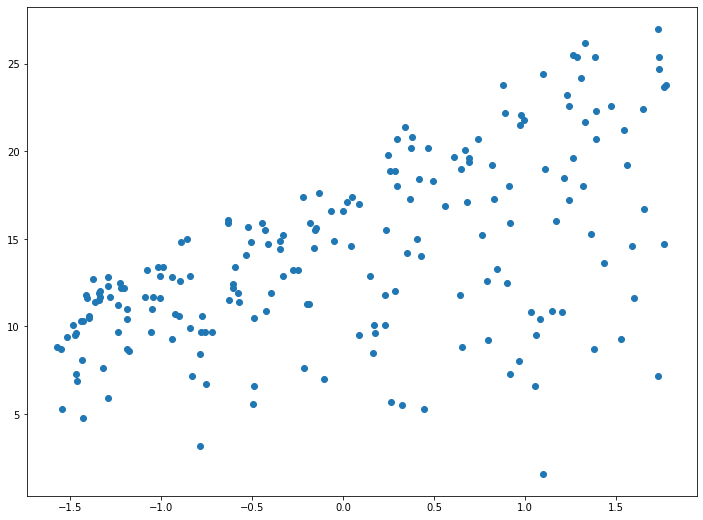

In [81]:
# here i am choosing 3rd column for x values and 4th column for y values 
X = d.iloc[:, 2]
Y = d.iloc[:, 4]
#X = d['GrLivArea']
#Y = d['SalePrice']
X=(X - X.mean()) / X.std()
#Y=(Y - Y.mean()) / Y.std()
plt.scatter(X, Y)
# no need to write down plt.show() as we already specify %matplotlib inline 
#plt.show() 
print(X.size)

# Gradient Descent

In [82]:
# Building the model
def bgd():
    theta1 = 0
    theta0 = 0

    L_R = 0.01  # The learning Rate
    iters = 10000 # The number of iterations to perform gradient descent

    m = X.size # Number of elements in X
    J=np.zeros(iters) #to store cost
    k=np.zeros(iters)
    parameters_0 = np.zeros(iters)
    parameters_1 = np.zeros(iters)
# Gradient Descent Algorithm
    for i in range(iters): 
        Y_pred = theta1*X + theta0  # The current predicted value of Y
        J[i]=(1/2*m)*sum(np.square(Y_pred-Y))
        Grad_theta1 = (2/m) * sum(X * (Y_pred-Y))  # Partial Derivative wrt theta1
        Grad_theta0 = (2/m) * sum(Y_pred-Y)  # Partial Derivative wrt theta0
        theta1=theta1- L_R * Grad_theta1  # Update m
        theta0 = theta0 - L_R * Grad_theta0  # Update c
        k[i]=i
        parameters_0[i]=theta0
        parameters_1[i]=theta1
    
    
#print (theta1, theta0)
    print(parameters_0)
    print(parameters_1)
    return(parameters_0,parameters_1,theta0,theta1,J,k)
%timeit bgd()
parameters_0_F,parameters_1_F,theta0_F,theta1_F,J_F,k_F=bgd()

[ 0.28045     0.555291    0.82463518 ... 14.0225     14.0225
 14.0225    ]
[0.05982768 0.1184648  0.17593503 ... 3.00641626 3.00641626 3.00641626]
[ 0.28045     0.555291    0.82463518 ... 14.0225     14.0225
 14.0225    ]
[0.05982768 0.1184648  0.17593503 ... 3.00641626 3.00641626 3.00641626]
[ 0.28045     0.555291    0.82463518 ... 14.0225     14.0225
 14.0225    ]
[0.05982768 0.1184648  0.17593503 ... 3.00641626 3.00641626 3.00641626]
[ 0.28045     0.555291    0.82463518 ... 14.0225     14.0225
 14.0225    ]
[0.05982768 0.1184648  0.17593503 ... 3.00641626 3.00641626 3.00641626]
[ 0.28045     0.555291    0.82463518 ... 14.0225     14.0225
 14.0225    ]
[0.05982768 0.1184648  0.17593503 ... 3.00641626 3.00641626 3.00641626]
[ 0.28045     0.555291    0.82463518 ... 14.0225     14.0225
 14.0225    ]
[0.05982768 0.1184648  0.17593503 ... 3.00641626 3.00641626 3.00641626]
[ 0.28045     0.555291    0.82463518 ... 14.0225     14.0225
 14.0225    ]
[0.05982768 0.1184648  0.17593503 ... 3.006

In [93]:
min(J_F)

361847.9549025084

In [94]:
J_F[-1]

361847.9549025089

In [95]:
min(parameters_0_F)

0.28045000000000003

In [96]:
min(parameters_1_F)

0.05982768347462589

In [97]:
theta1_F

3.0064162550063362

In [98]:
theta0_F

14.022499999999962

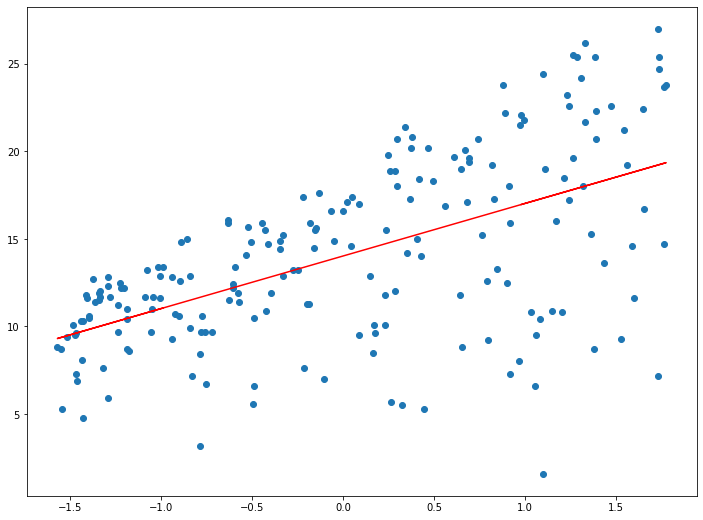

In [99]:
# Making predictions
Y_pred = theta1_F*X + theta0_F

plt.scatter(X, Y)
#plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.plot(X, Y_pred, color='red') # predicted

#plt.show()

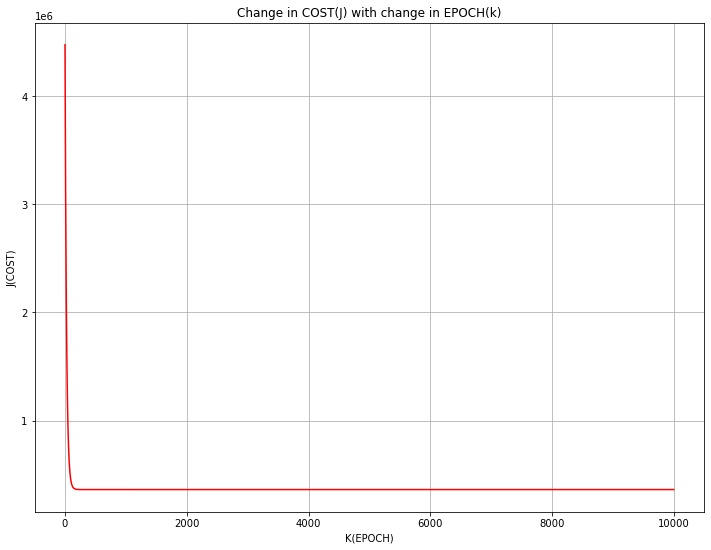

In [100]:
# plot between epoch (ie, the number of iteration vs cost )
plt.plot(k_F, J_F, color='red')
plt.xlabel('K(EPOCH)')
plt.ylabel('J(COST)')
plt.title('Change in COST(J) with change in EPOCH(k)')
plt.grid(True)

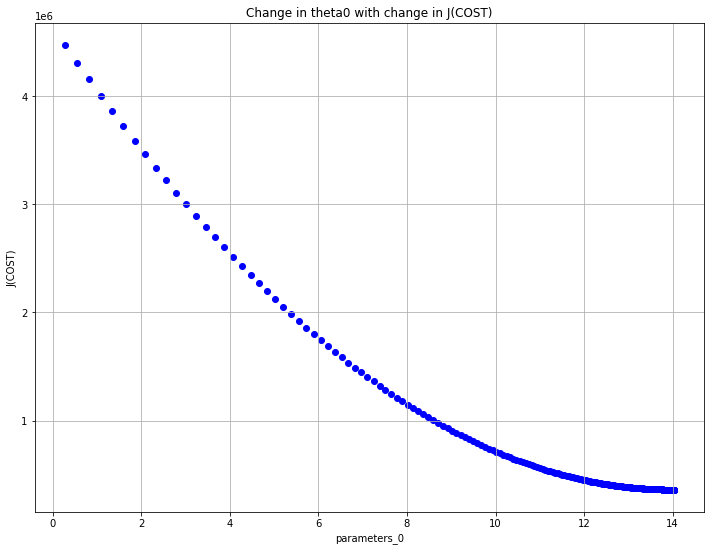

In [101]:
plt.scatter(parameters_0_F, J_F, color='blue')
plt.xlabel('parameters_0')
plt.ylabel('J(COST)')
plt.title('Change in theta0 with change in J(COST)')
plt.grid(True)

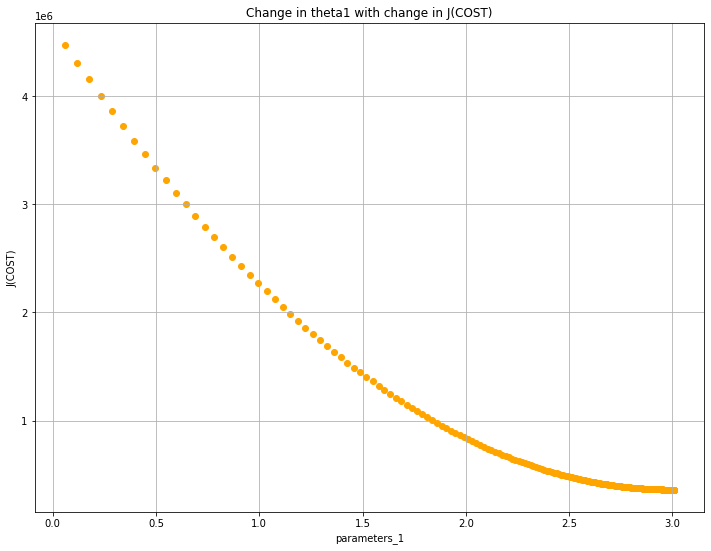

In [103]:
plt.scatter(parameters_1_F, J_F, color='orange')
plt.xlabel('parameters_1')
plt.ylabel('J(COST)')
plt.title('Change in theta1 with change in J(COST)')
plt.grid(True)

# Building the Stochastic Gradient Descent model

In [104]:
# Building the Stochastic Gradient Descent model
def sgd():
    theta11 = 1
    theta00 = 13

    L_R = 0.001# The learning Rate
    iters = 10000  #number of iterations to perform gradient descent

    m = X.size # Number of elements in X
    J=np.zeros(iters) #to store cost
    k=np.zeros(iters)
    parameters_00 = np.zeros(iters)
    parameters_11 = np.zeros(iters)
# Gradient Descent Algorithm
    for i in range(iters): 
        ind = np.random.randint(0, m)
    
    
        Xs = X[ind]
        ys = Y[ind]
        #N = len(Xs)
    
        Y_pred1 = theta11*Xs + theta00# The current predicted value of Y
    
        J[i]=(1/2)*(np.square(Y_pred1-ys))
    
        Grad_theta11 = (2) *(Xs * (Y_pred1-ys))  # Partial Derivative wrt theta1
        Grad_theta00 = (2) *(Y_pred1-ys)  # Partial Derivative wrt theta0
        theta11=theta11- L_R * Grad_theta11 # Update m
        theta00 = theta00 - L_R * Grad_theta00  # Update c
        k[i]=i
        parameters_00[i]=theta00
        parameters_11[i]=theta11
    
    
#print (theta1, theta0)
    print(parameters_00)
    return(parameters_00,parameters_11,theta00,theta11,J,k)
%timeit sgd()
parameters_0_F,parameters_1_F,theta0_F,theta1_F,J_F,k_F=sgd()

[12.99449346 12.99635528 12.99968454 ... 13.93990073 13.95001245
 13.96047928]
[13.00331845 13.00880317 13.01133321 ... 14.15633165 14.15820819
 14.16414331]
[13.02059939 13.01416408 13.00728681 ... 13.85987252 13.85100625
 13.86062533]
[12.99745098 13.01532253 13.02105771 ... 14.13622135 14.1409581
 14.14461195]
[13.00995995 13.01921037 13.02891669 ... 14.08429473 14.08376105
 14.088883  ]
[13.02223568 13.02968859 13.0297067  ... 13.99383647 14.00099449
 13.98669659]
[13.00396311 12.99423888 12.98387545 ... 14.07103421 14.07372231
 14.08471402]
[13.00746142 13.00376795 13.004704   ... 14.25375206 14.25469711
 14.26203917]
1.43 s ± 40.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
[12.98370607 12.97747917 12.98077432 ... 13.98305288 13.97885175
 13.96548173]


In [105]:
min(parameters_0_F)

12.932945457220557

In [106]:
min(parameters_1_F)

0.9662097453762016

In [107]:
min(J_F)

9.852192600111586e-09

In [108]:
theta0_F

13.965481730643093

In [109]:
theta1_F

2.9024872861024527

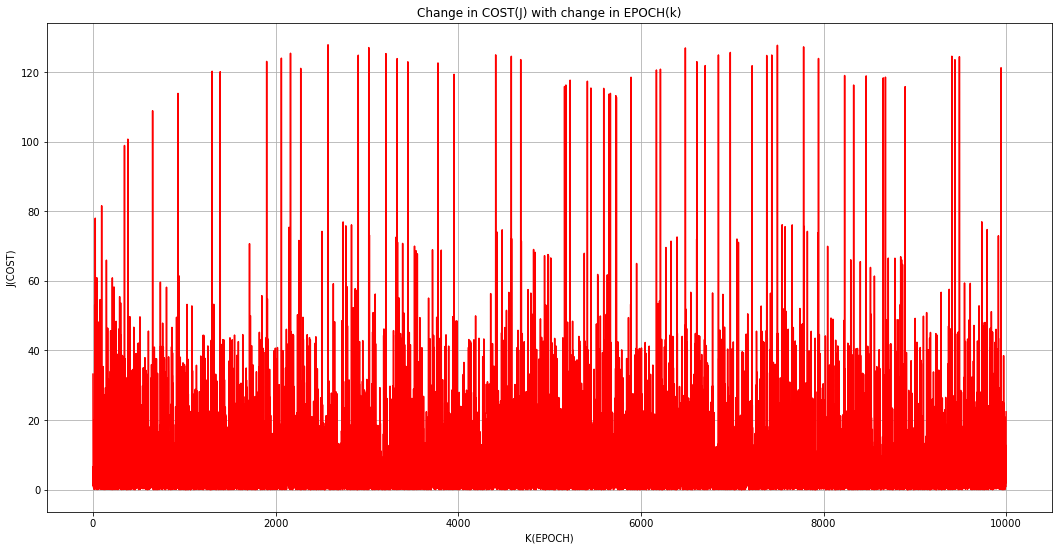

In [110]:
plt.rcParams['figure.figsize'] = (18.0, 9.0)


# plot between epoch (ie, the number of iteration vs cost )
plt.plot(k_F, J_F, color='red')
plt.xlabel('K(EPOCH)')
plt.ylabel('J(COST)')
plt.title('Change in COST(J) with change in EPOCH(k)')
plt.grid(True)

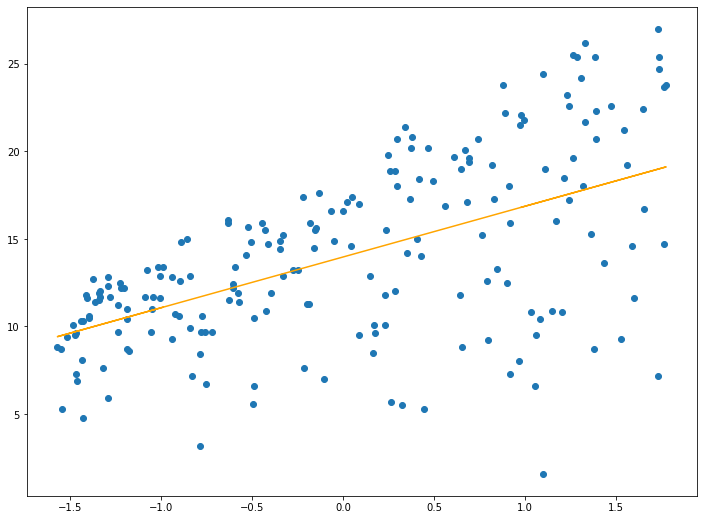

In [111]:
plt.rcParams['figure.figsize'] = (12.0, 9.0)


# Making predictions
Y_pred = theta1_F*X + theta0_F

plt.scatter(X, Y)
#plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.plot(X, Y_pred, color='orange') # predicted

#plt.show()

# train.csv FILE IS TAKEN

In [2]:
d=pd.read_csv('C:/Users/Prabal Ghosh/Desktop/train.csv')

In [3]:
d

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
d.dropna(axis=0,how='any' ,thresh=None, subset=['LotFrontage','SalePrice'], inplace=True)


In [5]:
d.loc[:,"SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1201, dtype: int64

In [6]:
d.iloc[:,80].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1201 non-null   int64  
 1   MSSubClass     1201 non-null   int64  
 2   MSZoning       1201 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1201 non-null   int64  
 5   Street         1201 non-null   object 
 6   Alley          86 non-null     object 
 7   LotShape       1201 non-null   object 
 8   LandContour    1201 non-null   object 
 9   Utilities      1201 non-null   object 
 10  LotConfig      1201 non-null   object 
 11  LandSlope      1201 non-null   object 
 12  Neighborhood   1201 non-null   object 
 13  Condition1     1201 non-null   object 
 14  Condition2     1201 non-null   object 
 15  BldgType       1201 non-null   object 
 16  HouseStyle     1201 non-null   object 
 17  OverallQual    1201 non-null   int64  
 18  OverallC

In [8]:
X = d['LotFrontage']
X

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1201, dtype: float64

In [9]:
plt.rcParams['figure.figsize'] = (12.0, 9.0)

1201


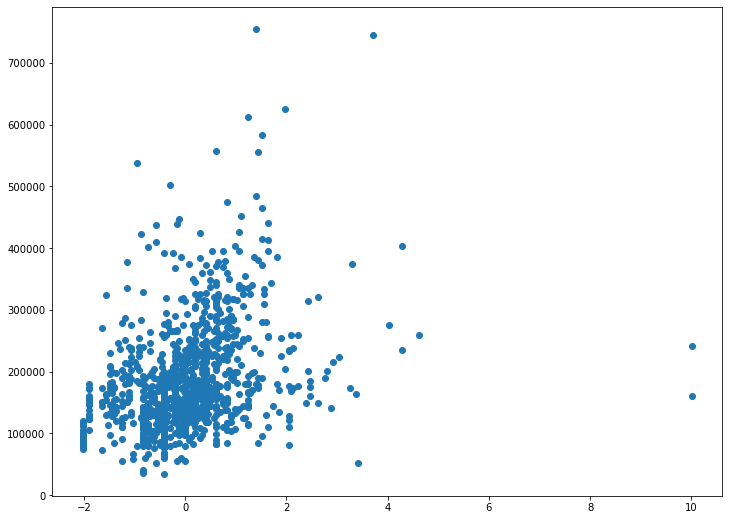

In [10]:
X= d['LotFrontage']
Y = d.iloc[:, 80]
#X = d['GrLivArea']
#Y = d['SalePrice']
X=(X - X.mean()) / X.std()
#Y=(Y - Y.mean()) / Y.std()
plt.scatter(X, Y)
# no need to write down plt.show() as we already specify %matplotlib inline 
#plt.show() 
print(X.size)

In [11]:
# Building the Stochastic Gradient Descent model
def sgd1():
    theta11 = 1
    theta00 = 13

    L_R = 0.001 # The learning Rate
    iters = 10000  #number of iterations to perform gradient descent

    m = X.size # Number of elements in X
    J=np.zeros(iters) #to store cost
    k=np.zeros(iters)
    parameters_00 = np.zeros(iters)
    parameters_11 = np.zeros(iters)
# Gradient Descent Algorithm
    for i in range(iters): 
        ind = np.random.randint(0, m)
    
    
        Xs = X[ind]
        ys = Y[ind]
        #N = len(Xs)
    
        Y_pred1 = theta11*Xs + theta00 # The current predicted value of Y
    
        J[i]=(1/2)*(np.square(Y_pred1-ys))
    
        Grad_theta11 = (2) *(Xs * (Y_pred1-ys))  # Partial Derivative wrt theta1
        Grad_theta00 = (2) *(Y_pred1-ys)  # Partial Derivative wrt theta0
        theta11=theta11- L_R * Grad_theta11 # Update m
        theta00 = theta00 - L_R * Grad_theta00  # Update c
        k[i]=i
        parameters_00[i]=theta00
        parameters_11[i]=theta11
       
    print(parameters_00)
    
#print (theta1, theta0)
     
   # return(parameters_00,parameters_11,theta00,theta11,J,k)
%timeit sgd1()
#parameters_0_F,parameters_1_F,theta0_F,theta1_F,J_F,k_F=sgd1()

KeyError: 100